<a href="https://colab.research.google.com/github/Sly-ai/Data-Analysis_jupyter_notebook/blob/main/Gala_Groceries_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The purpose of this notebook is to conduct exploratory data analysis of the Gala Groceries Sales Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/CSV files/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.info()
print("-------------")
df.describe()

!pip install seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
-------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    """
    Plots the distribution of continuous data.

    Parameters:
    - data: DataFrame containing the data.
    - column: Name of the column to plot.
    - height: Height of the plot.
    """
    if data is None or column is None:
        raise ValueError("Both data and column must be provided.")

    plt.figure(figsize=(height, height/5))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

def get_unique_values(data: pd.DataFrame, column: str):
    """
    Prints unique values and their counts for a given column.

    Parameters:
    - data: DataFrame containing the data.
    - column: Name of the column.
    """
    if data is None or column not in data.columns:
        raise ValueError("Invalid data or column name.")

    unique_values = data[column].unique()
    num_unique_values = len(unique_values)
    value_counts = data[column].value_counts()

    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    """
    Plots the distribution of categorical data.

    Parameters:
    - data: DataFrame containing the data.
    - column: Name of the categorical column to plot.
    - height: Height of the plot.
    - aspect: Aspect ratio of the plot.
    """
    if data is None or column is None:
        raise ValueError("Both data and column must be provided.")

    sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect)
    plt.title(f'Distribution of {column}')
    plt.show()


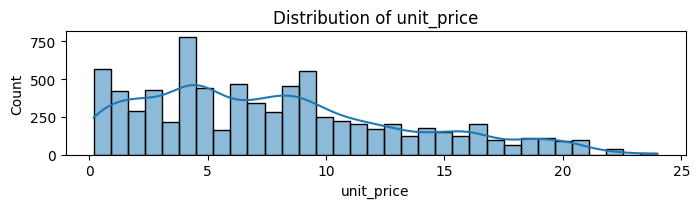

In [ ]:
plot_continuous_distribution(df, 'unit_price')

The distribution of unit_price is positively skewed, showing high volume for less priced products such a perisable items `(fruits, vegetables, canned goods) compared to high price products.

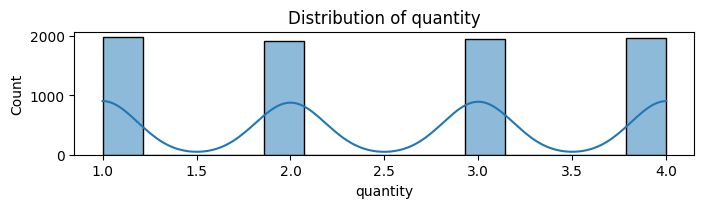

In [ ]:
plot_continuous_distribution(df, 'quantity')

The distribution of quantity is very different. We can see that only 4 unique values exist (1, 2, 3, and 4) and they are quite evenly distributed. It seems as though customers are buying in even quantities across 1 to 4 units

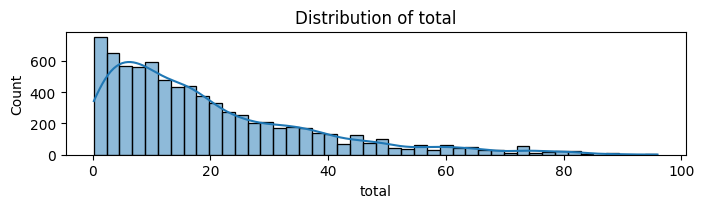

In [ ]:
plot_continuous_distribution(df, 'total')

The total follows a similar distribution to unit_price. This is expected, as the total is calculated as unit_price x quantity.

However, this distribution is even more positively skewed. Once again, using intuition, this distribution makes sense. As expected customers at a grocery store to generally make more transactions of low value and only occasionally make a transaction of a very high value.




In [ ]:
get_unique_values(df, 'transaction_id')
print()
get_unique_values(df, 'product_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5ad

As explained previously, transaction_id is a unique ID column for each transaction. Since each row represents a unique transaction, this means that we have 7829 unique transaction IDs. Therefore, this column is not useful to visualise.

---
Similarly, product_id is an ID column, however it is unique based on the product that was sold within the transaction. From this computation, we can see that we have 300 unique product IDs, hence 300 unique products within the dataset. This is not worth visualising, but it certainly interesting to know. From the output of the helper function, we can see that the product most frequently was sold within this dataset was ecac012c-1dec-41d4-9ebd-56fb7166f6d9, sold 114 times during the week. Whereas the product least sold was ec0bb9b5-45e3-4de8-963d-e92aa91a201e sold just 3 times

In [ ]:
get_unique_values(df, 'category')
print("___________________________________________________")
get_unique_values(df, 'customer_type')


Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64
___________________________________________________
Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


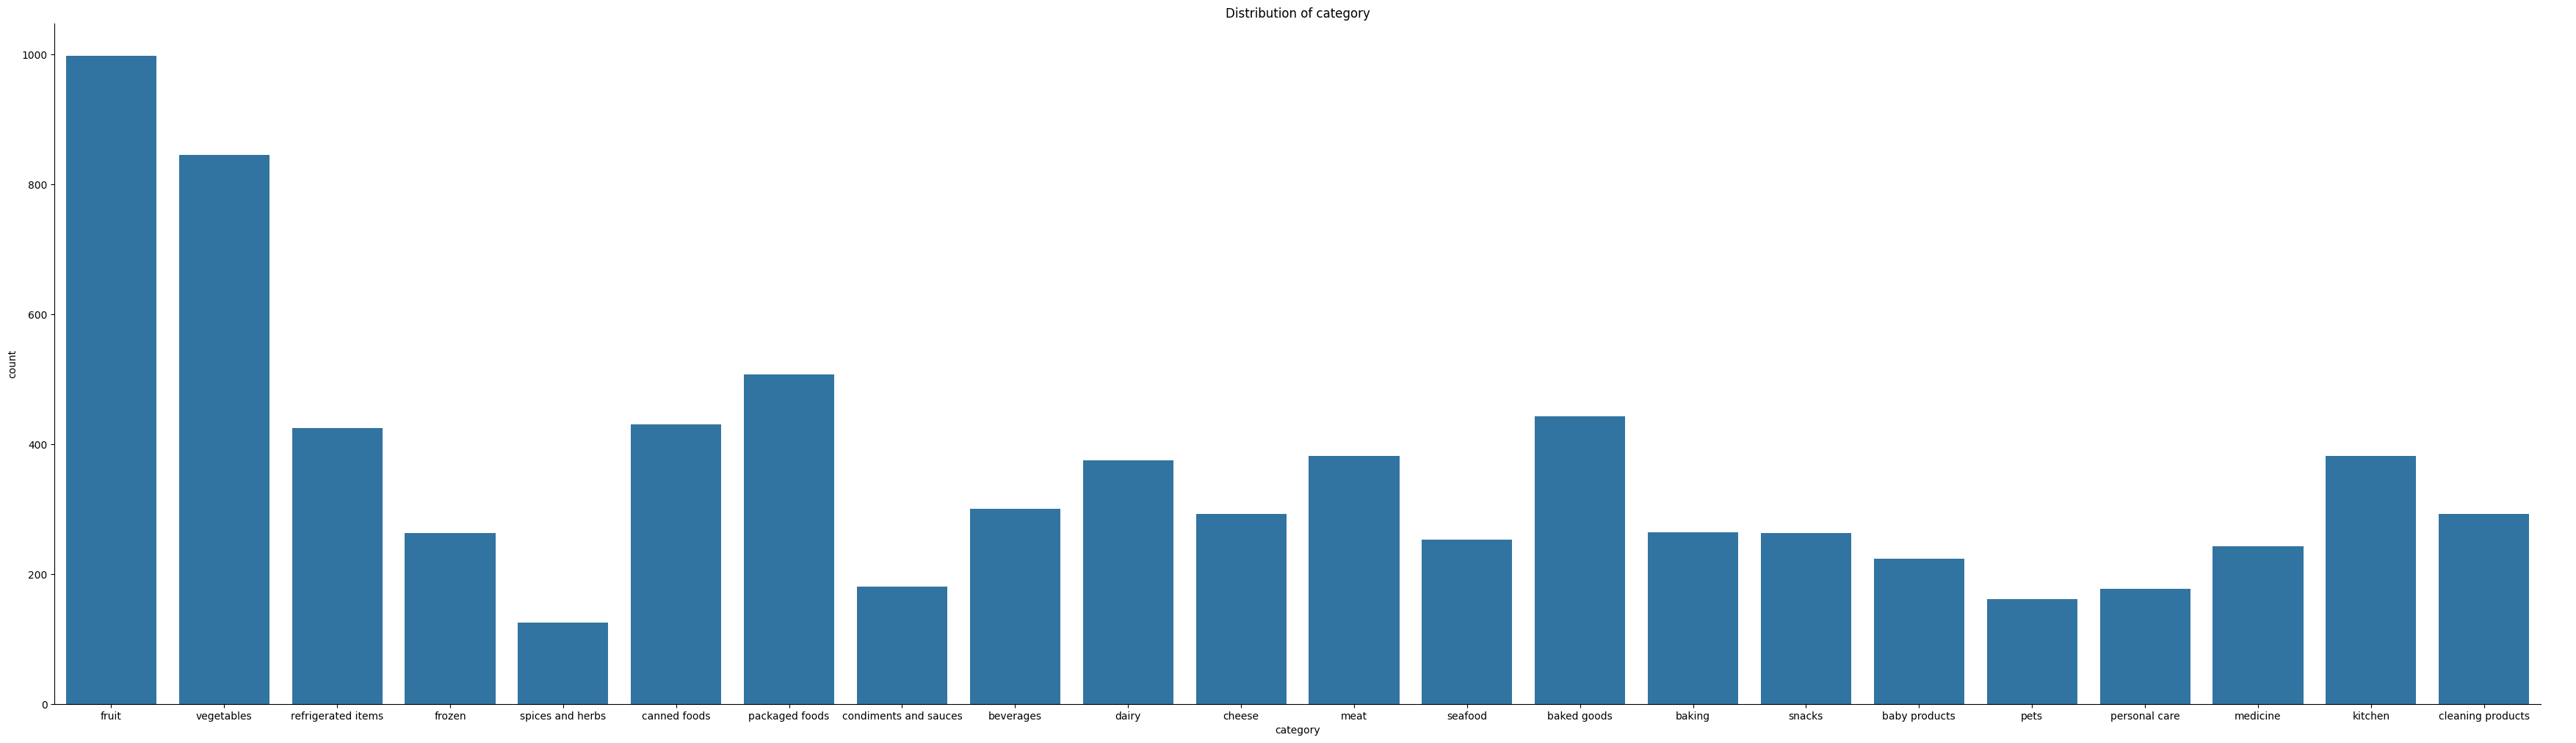

In [ ]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

There are 22 unique values for `category`, with `fruit` and `vegetables` being the 2 most frequently purchased product categories and `spices and herbs` being the least.

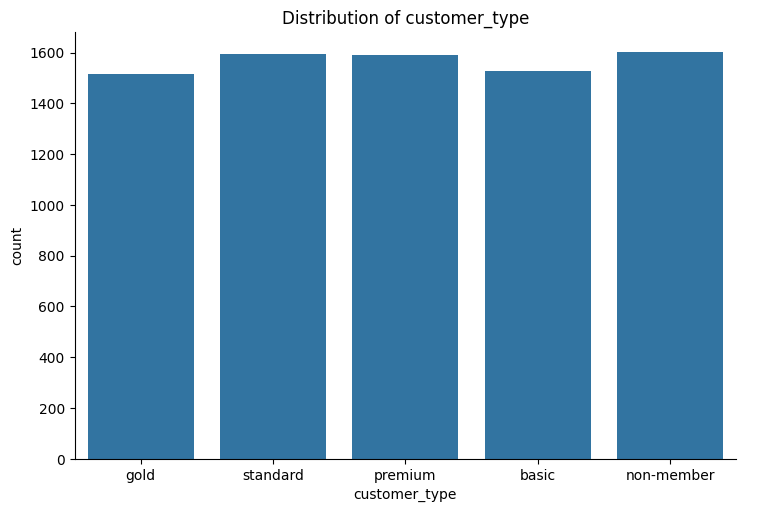

In [ ]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

From this sample of data, `non-members` appear to be the most frequent type of customers, closely followed by `standard` and `premium customers`

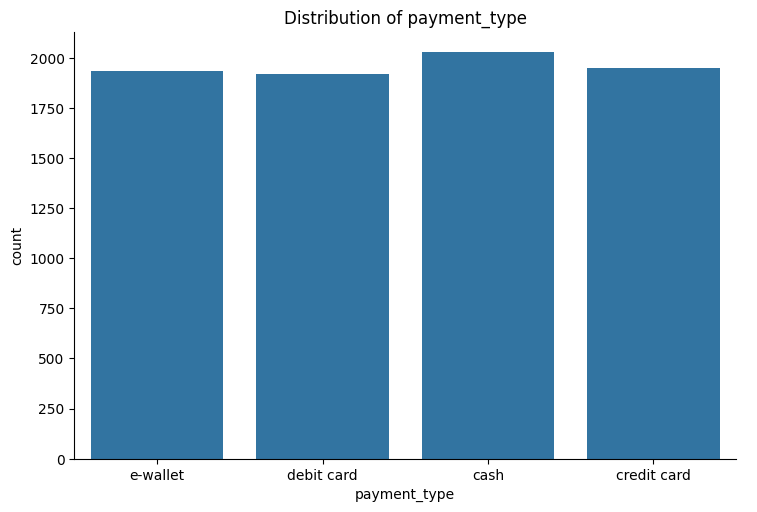

In [ ]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)

Interestingly, cash seems to be the most frequently used method of payment from this sample of data, with debit cards being the least frequent.

This dataset is a sample from 1 store across 1 week. So it will be interesting to see if the population sample follows similar patterns.

In [ ]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


The column named `timestamp` appears to be categorical, but in actual fact it's not. This is a datetime, following the format of `2022-03-01 10:00:45 = YYYY-MM-DD HH:MM:SS`. Therefore, we must transform this column to reflect its true form.

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

df = convert_to_datetime(df, 'timestamp')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


Using the `.info()` method again, we can see that the timestamp is now of type `datetime64[ns`, which indicates it is a datetime based data type. Now that this is a datetime column, we can explode this column out into its consitituent parts, e.g. we can explode datetime into hour for example.

In [ ]:
df['hour'] = df['timestamp'].dt.hour
df.head()
get_unique_values(df, 'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


From this we can see that the 11th, 16th and 18th hour of the day are the top 3 hours of the day for transactions being processed. This is interesting, this would suggest that their busiest times of day may be just before lunch, and as people are on the way home from work. Once again, this is a small sample of data, so we can't make assumptions on the population sample of data, but it gives us insights to go back to the business with.

# Correlations

> By now, you should have a good understanding of all the columns within the dataset, as well as the values that occur within each column. One more thing that we can do is to look at how each of the numerical columns are related to each other.

> To do this, we can use correlations. Correlations measure how each numeric column is linearly related to each other. It is measured between -1 and 1. If a correlation between 2 columns is close to -1, it shows that there is a negative correlation, that is, as 1 increases, the other decreases. If a correlation between 2 columns is close to 1, it shows that they are positively correlated, that is, as 1 increases, so does the other. Therefore, correlations do not infer that one column causes the other, but it gives us an indication as to how the columns are linearly related

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-58-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Unnamed: 0,unit_price,quantity,total,hour
Unnamed: 0,1.000000,0.623392,0.003927,0.483878,0.001565
unit_price,0.623392,1.000000,0.024588,0.792018,0.010842
quantity,0.003927,0.024588,1.000000,0.521926,-0.008410
total,0.483878,0.792018,0.521926,1.000000,0.010354
hour,0.001565,0.010842,-0.008410,0.010354,1.000000


From this correlation matrix, we can see that the only columns that have a high correlation are unit_price and total. This is understandable because total is calculated used unit_price.

All the other correlations are close to 0, indicating that there is not a significant positive or negative correlation between the numeric variables.

# Summary

Having completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

`"How to better stock the items that they sell"`

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

We need more rows of data. The current sample is only from 1 store and 1 week worth of data
We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for